In [24]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df= pd.read_csv(r'C:\Users\user\Downloads\Аналитик — тестовое задание - data.csv', delimiter=',')
#delimiter=','


1. График посещаемости по дням
Построим график, который показывает количество посещенных и пропущенных уроков по дням.

<Figure size 1200x600 with 0 Axes>

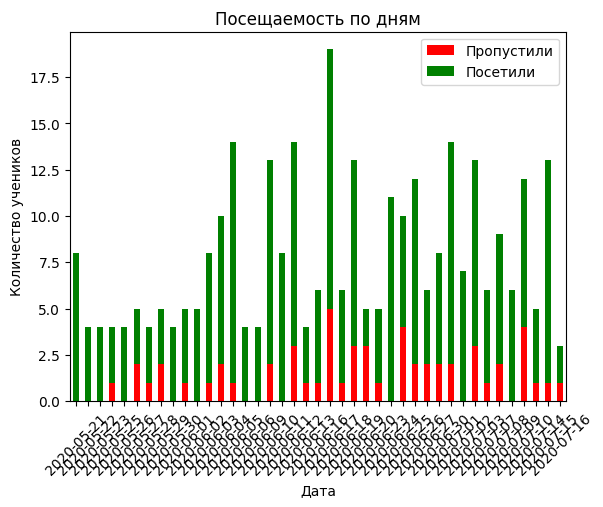

In [25]:
attendance_by_day = df.groupby(['event_date', 'is_attend']).size().unstack(fill_value=0)

# Построение графика
plt.figure(figsize=(12, 6))
attendance_by_day.plot(kind='bar', stacked=True, color=['red', 'green'])
plt.title('Посещаемость по дням')
plt.xlabel('Дата')
plt.ylabel('Количество учеников')
plt.legend(['Пропустили', 'Посетили'])
plt.xticks(rotation=45)
plt.show()

In [26]:
# Преобразуем event_date в тип datetime
df['event_date'] = pd.to_datetime(df['event_date'])

# Группировка по дате и подсчет количества посещений и пропусков
attendance_by_day = df.groupby(['event_date', 'is_attend']).size().unstack(fill_value=0)
attendance_by_day.columns = ['Пропустили', 'Посетили']  # Переименуем колонки для удобства

# Создание интерактивного графика с помощью Plotly
fig = px.bar(
    attendance_by_day.reset_index(),
    x='event_date',
    y=['Посетили', 'Пропустили'],
    title='Посещаемость по дням',
    labels={'event_date': 'Дата', 'value': 'Количество учеников'},
    barmode='stack'
)

# Добавляем возможность выбора даты
fig.update_xaxes(
    rangeslider_visible=True,  # Добавляем ползунок для выбора диапазона дат
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1 месяц", step="month", stepmode="backward"),
            dict(count=3, label="3 месяца", step="month", stepmode="backward"),
            dict(count=6, label="6 месяцев", step="month", stepmode="backward"),
            dict(step="all", label="Все даты")
        ])
    )
)

# Показываем график
fig.show()

2. Гистограмма распределения посещаемости
Построим гистограмму, чтобы увидеть распределение посещаемости (сколько учеников посетили или пропустили уроки).

C:\Users\user\AppData\Local\Temp\ipykernel_18696\2415385892.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




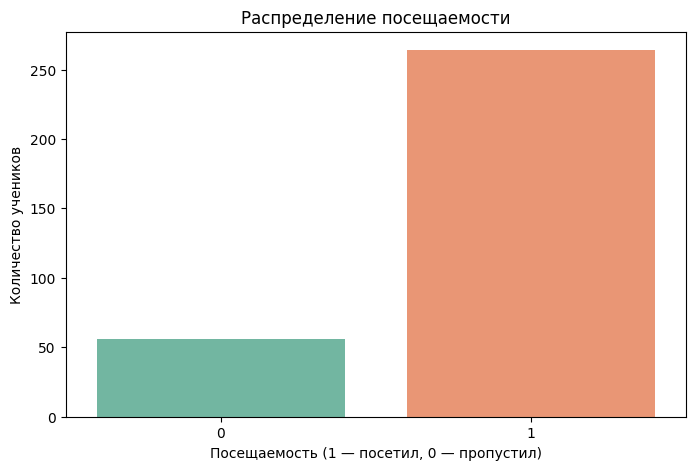

In [27]:
plt.figure(figsize=(8, 5))
sns.countplot(x='is_attend', data=df, palette='Set2')
plt.title('Распределение посещаемости')
plt.xlabel('Посещаемость (1 — посетил, 0 — пропустил)')
plt.ylabel('Количество учеников')
plt.show()

3. Boxplot посещаемости по группам
Построим boxplot, чтобы сравнить посещаемость по разным группам (group_ids).

C:\Users\user\AppData\Local\Temp\ipykernel_18696\2564656783.py:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\user\AppData\Local\Temp\ipykernel_18696\2564656783.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




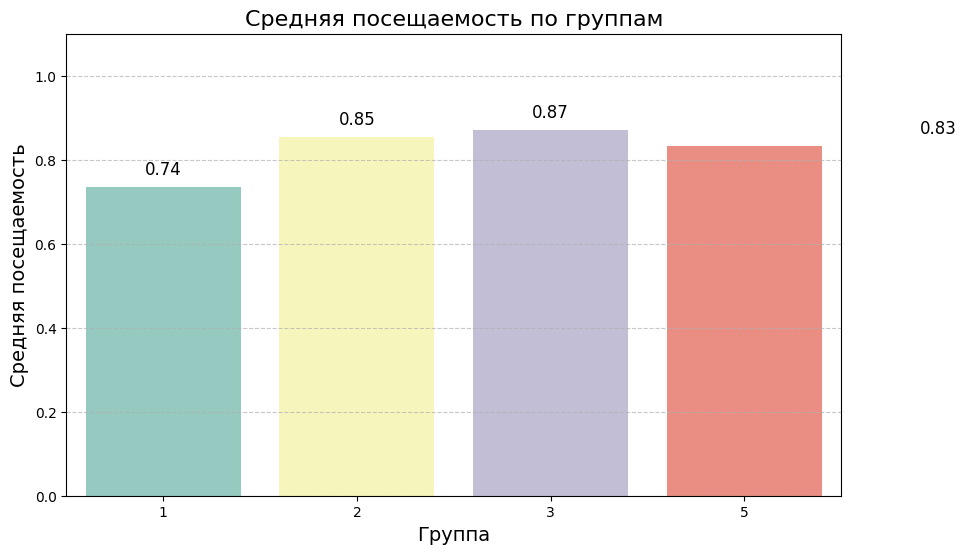

In [28]:
plt.figure(figsize=(10, 6))

# Используем barplot для отображения средней посещаемости по группам
sns.barplot(x='group_ids', y='is_attend', data=df, palette='Set3', ci=None, estimator='mean')

# Добавляем аннотации
for group in df['group_ids'].unique():
    mean_attendance = df[df['group_ids'] == group]['is_attend'].mean()
    plt.text(group - 1, mean_attendance + 0.02, f'{mean_attendance:.2f}', ha='center', va='bottom', fontsize=12)

# Настройка графика
plt.title('Средняя посещаемость по группам', fontsize=16)
plt.xlabel('Группа', fontsize=14)
plt.ylabel('Средняя посещаемость', fontsize=14)
plt.ylim(0, 1.1)  # Ограничиваем ось Y для лучшей визуализации
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Добавляем сетку
plt.show()

In [29]:
# Группировка данных по группам и расчет средней посещаемости
attendance_by_group = df.groupby('group_ids')['is_attend'].mean().reset_index()

# Создание интерактивного графика
fig = px.bar(
    attendance_by_group,
    x='group_ids',
    y='is_attend',
    labels={'group_ids': 'Группа', 'is_attend': 'Средняя посещаемость'},
    title='Средняя посещаемость по группам',
    text='is_attend'
)

# Настройка отображения текста
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')

# Настройка осей и сетки
fig.update_xaxes(title_text='Группа', tickvals=attendance_by_group['group_ids'])
fig.update_yaxes(title_text='Средняя посещаемость', range=[0, 1.1])
fig.update_layout(showlegend=False, template='plotly_white')

# Показываем график
fig.show()

4. График посещаемости по преподавателям
Построим график, чтобы увидеть, как посещаемость распределяется по разным преподавателям (teacher_ids).

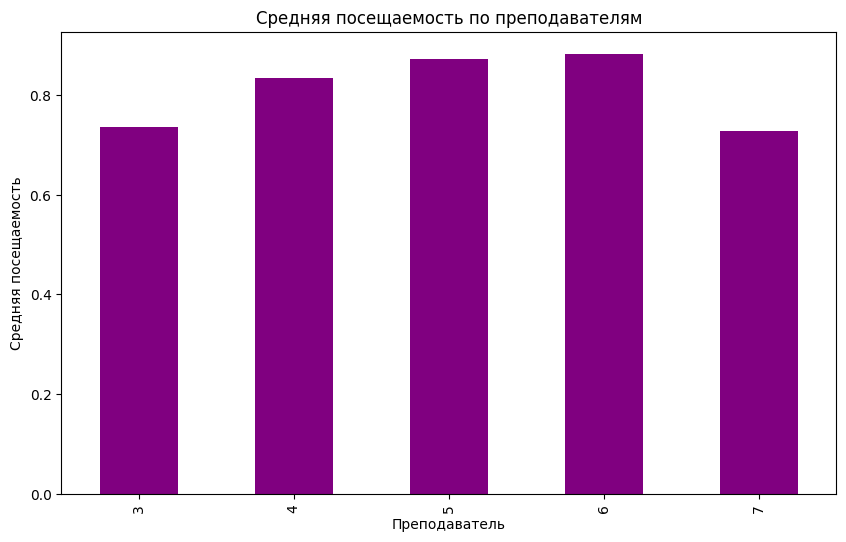

In [30]:
# Группировка по преподавателям и подсчет средней посещаемости
attendance_by_teacher = df.groupby('teacher_ids')['is_attend'].mean()

# Построение графика
plt.figure(figsize=(10, 6))
attendance_by_teacher.plot(kind='bar', color='purple')
plt.title('Средняя посещаемость по преподавателям')
plt.xlabel('Преподаватель')
plt.ylabel('Средняя посещаемость')
plt.show()

5. Тепловая карта посещаемости по группам и преподавателям
Построим тепловую карту, чтобы увидеть, как посещаемость зависит от группы и преподавателя.

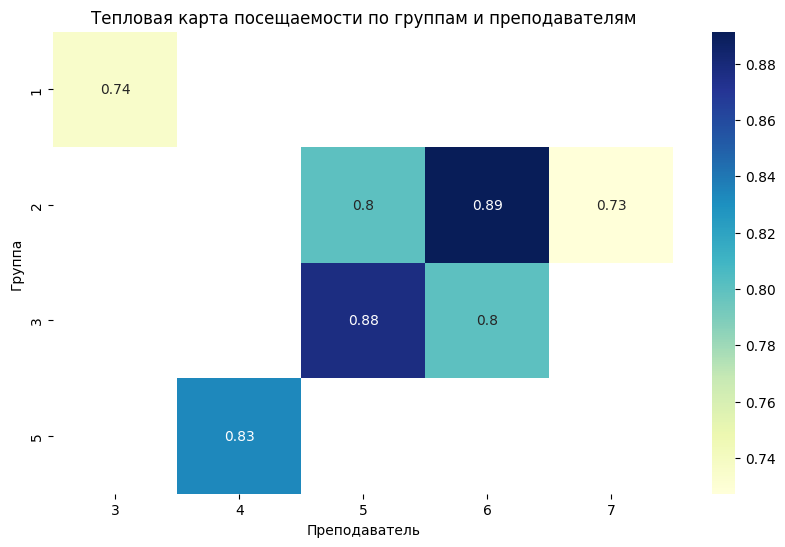

In [31]:
# Создание сводной таблицы
pivot_table = df.pivot_table(values='is_attend', index='group_ids', columns='teacher_ids', aggfunc='mean')

# Построение тепловой карты
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', cbar=True)
plt.title('Тепловая карта посещаемости по группам и преподавателям')
plt.xlabel('Преподаватель')
plt.ylabel('Группа')
plt.show()

6. График посещаемости для каждого ученика
Построим график, чтобы увидеть, как часто каждый ученик (customer_id) посещает уроки.

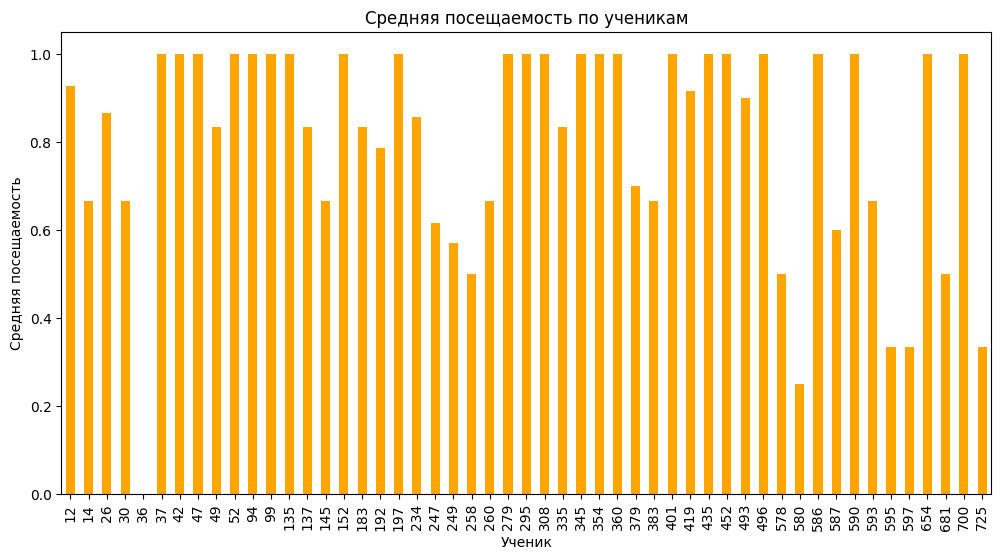

In [32]:
# Группировка по ученикам и подсчет средней посещаемости
attendance_by_student = df.groupby('customer_id')['is_attend'].mean()

# Построение графика
plt.figure(figsize=(12, 6))
attendance_by_student.plot(kind='bar', color='orange')
plt.title('Средняя посещаемость по ученикам')
plt.xlabel('Ученик')
plt.ylabel('Средняя посещаемость')
plt.show()

Итог:
Эти визуализации помогут вам проанализировать:

Как посещаемость меняется по дням.

Как распределяется посещаемость между группами и преподавателями.

Как часто ученики посещают уроки.